In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [55]:
df.query('UnitPrice < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [56]:
df_sem_negativos = df.query('(Quantity > 0) and (UnitPrice > 0)').copy()

In [57]:
df_sem_negativos['Total'] = df_sem_negativos['Quantity'] * df_sem_negativos['UnitPrice']

In [58]:
produtos_mais_vendidos = df_sem_negativos.groupby('Description')['Quantity'].sum()

produtos_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False)

produtos_mais_vendidos.head(15)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48474
WHITE HANGING HEART T-LIGHT HOLDER,37891
POPCORN HOLDER,36761
ASSORTED COLOUR BIRD ORNAMENT,36461
PACK OF 72 RETROSPOT CAKE CASES,36419
RABBIT NIGHT LIGHT,30788


In [59]:
produtos_mais_rentaveis = df_sem_negativos.groupby('Description')['Total'].sum()

produtos_mais_rentaveis = produtos_mais_rentaveis.sort_values(ascending=False)

produtos_mais_rentaveis.head(15)

,Total
Description,
DOTCOM POSTAGE,206248.77
REGENCY CAKESTAND 3 TIER,174484.74
"PAPER CRAFT , LITTLE BIRDIE",168469.60
WHITE HANGING HEART T-LIGHT HOLDER,106292.77
PARTY BUNTING,99504.33
JUMBO BAG RED RETROSPOT,94340.05
MEDIUM CERAMIC TOP STORAGE JAR,81700.92
Manual,78112.82
POSTAGE,78101.88


In [65]:
ticket_medio_pedido = df_sem_negativos.groupby('InvoiceNo')['Total'].sum().mean()

print(f"Ticket médio por pedido: {ticket_medio_pedido:.2f}")

Ticket médio por pedido: 534.40


In [66]:
ticket_medio_comprador = df_sem_negativos.groupby('CustomerID')['Total'].sum().mean()

print(f"Ticket médio por comprador: {ticket_medio_comprador:.2f}")

Ticket médio por comprador: 2054.27


In [67]:
maiores_compradores = df_sem_negativos.groupby('CustomerID')['Total'].sum()

maiores_compradores = maiores_compradores.sort_values(ascending=False)

maiores_compradores.head(10)

,Total
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
12415.0,124914.53
14156.0,117379.63
17511.0,91062.38
16029.0,81024.84


In [68]:
df_data = df_sem_negativos.copy()

In [69]:
df_data['InvoiceDate'] = pd.to_datetime(df_data['InvoiceDate'])

df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [70]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   Total        530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


In [100]:
df_data['ano'] = df_data['InvoiceDate'].dt.year
df_data['mes'] = df_data['InvoiceDate'].dt.month
df_data['horario'] = df_data['InvoiceDate'].dt.hour
df_data['dia'] = df_data['InvoiceDate'].dt.day
df_data['data'] = df_data['InvoiceDate'].dt.date
df_data['data'] = pd.to_datetime(df_data['data'])

df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,mes,horario,dia,ano,data
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,8,1,2010,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,1,2010,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,8,1,2010,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,1,2010,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,1,2010,2010-12-01


In [88]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   Total        530104 non-null  float64       
 9   mes          530104 non-null  int32         
 10  horario      530104 non-null  int32         
 11  dia          530104 non-null  int32         
 12  ano          530104 non-null  int32         
 13  data         530104 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(5)
memory usage: 52.6+ MB


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

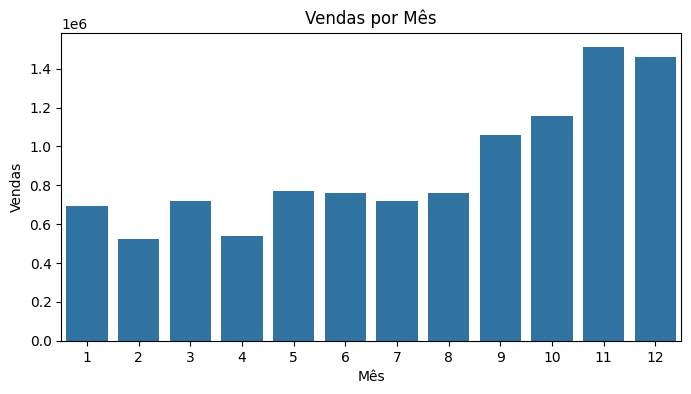

In [90]:
df_por_mes = df_data.groupby('mes')['Total'].sum().reset_index()

plt.figure(figsize = (8, 4))

sns.barplot(x = 'mes', y = 'Total', data = df_por_mes)
plt.title("Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.show()

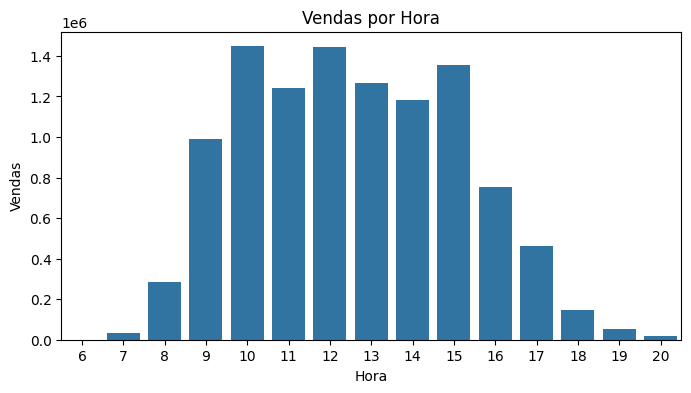

In [91]:
df_por_horario = df_data.groupby('horario')['Total'].sum().reset_index()

plt.figure(figsize = (8, 4))

sns.barplot(x = 'horario', y = 'Total', data = df_por_horario)
plt.title("Vendas por Hora")
plt.xlabel("Hora")
plt.ylabel("Vendas")
plt.show()

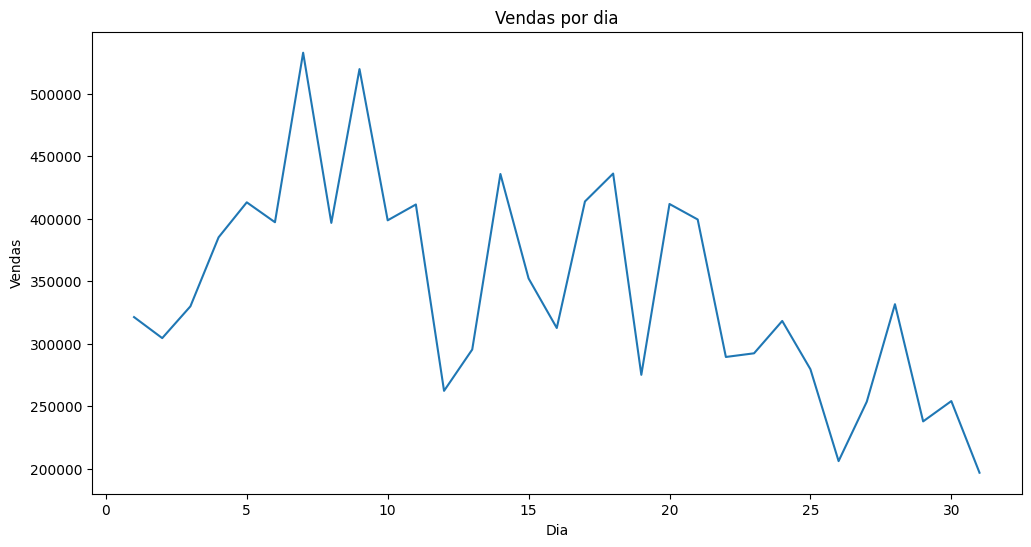

In [93]:
df_por_dia = df_data.groupby('dia')['Total'].sum().reset_index()

plt.figure(figsize = (12, 6))

sns.lineplot(x = 'dia', y = 'Total', data = df_por_dia)
plt.title("Vendas por dia")
plt.xlabel("Dia")
plt.ylabel("Vendas")
plt.show()

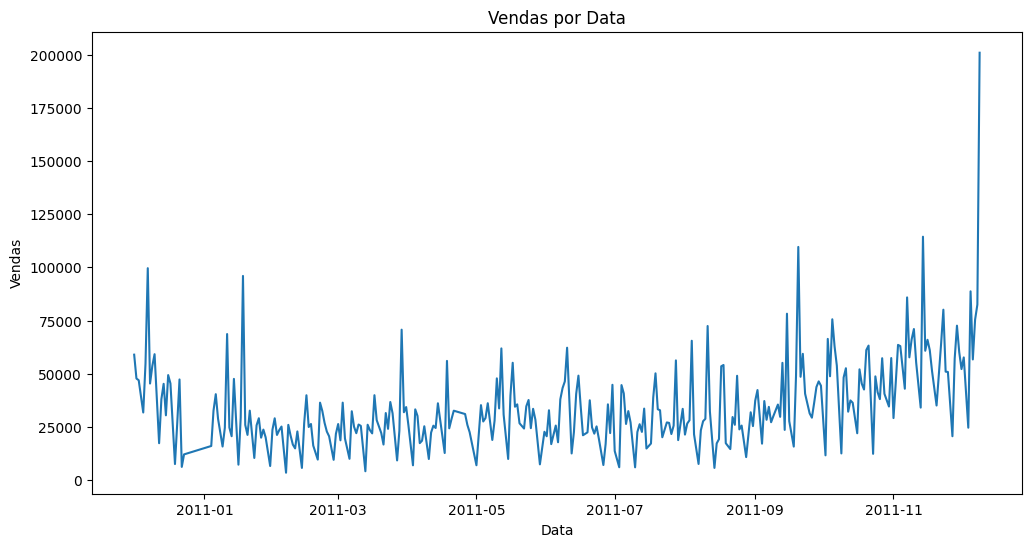

In [108]:
df_por_data = df_data.groupby('data')['Total'].sum().reset_index()

plt.figure(figsize = (12, 6))

sns.lineplot(x = 'data', y = 'Total', data = df_por_data)
plt.title("Vendas por Data")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.show()

In [110]:
df_por_data.sort_values(by='Total', ascending=False).head(5)

,data,Total
304,2011-12-09,200920.60
282,2011-11-14,114419.89
235,2011-09-20,109612.03
5,2010-12-07,99618.20
32,2011-01-18,95978.05


In [118]:
df_por_pais = df_sem_negativos.groupby('Country')['Total'].sum().reset_index()

df_por_pais = df_por_pais.sort_values(by='Total', ascending=False)

df_por_pais.head() #EIRE é a Irlanda!

,Country,Total
36,United Kingdom,9025222.084
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110


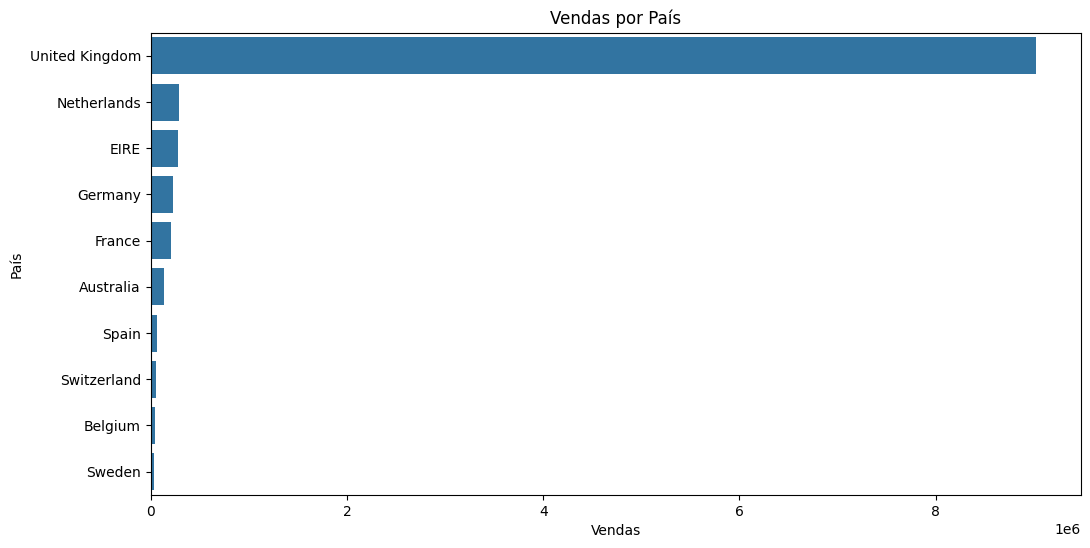

In [121]:
plt.figure(figsize = (12, 6))

sns.barplot(y = 'Country', x = 'Total', data = df_por_pais.head(10))
plt.title("Vendas por País")
plt.xlabel("Vendas")
plt.ylabel("País")
plt.show()

## 📌 Insights de Negócio

### ⏰ Horário de pico de vendas
As vendas se concentram entre **10h e 15h**, sugerindo que campanhas promocionais e e-mails marketing devem ser priorizados nesse intervalo.

### 📅 Sazonalidade mensal
Os meses de **novembro e dezembro** apresentaram picos de faturamento. Estratégias como **descontos de Black Friday**, **Natal** e **frete grátis** devem ser intensificadas nesse período.

### 📆 Sazonalidade diária
Os dias **5 a 10 de cada mês** mostram maior volume de vendas, indicando possível relação com **pagamento de salários**. Promoções nesses dias podem potencializar o faturamento.

### 👥 Perfil de compradores
Um **pequeno grupo de clientes representa a maior parte da receita**. Estratégias de **fidelização** (como **cashback** e **clube VIP**) podem gerar grande retorno.

### 🌍 Mercado internacional
O **Reino Unido** domina as vendas, mas **Irlanda (EIRE)** e **Países Baixos** também se destacam. Há **oportunidade para campanhas regionais** nesses países.
### 💸 Indicadores Financeiros

- **Ticket médio por pedido**: £534,40 – cada compra tem, em média, esse valor total.  
- **Ticket médio por comprador**: £2.054,27 – representa o valor médio gasto por cliente único.  

## 🛍️ Produtos com Maior Desempenho

### Mais vendidos (em unidades):

| Produto                              | Quantidade |
|--------------------------------------|------------|
| PAPER CRAFT , LITTLE BIRDIE          | 80.995     |
| MEDIUM CERAMIC TOP STORAGE JAR       | 78.033     |
| WORLD WAR 2 GLIDERS ASSTD DESIGNS    | 55.047     |
| JUMBO BAG RED RETROSPOT              | 48.474     |
| WHITE HANGING HEART T-LIGHT HOLDER   | 37.891     |

### Mais rentáveis (em receita total):

| Produto                              | Receita Total |
|--------------------------------------|----------------|
| DOTCOM POSTAGE                       | £206.248,77    |
| REGENCY CAKESTAND 3 TIER             | £174.484,74    |
| PAPER CRAFT , LITTLE BIRDIE          | £168.469,60    |
| WHITE HANGING HEART T-LIGHT HOLDER   | £106.292,77    |
| PARTY BUNTING                        | £99.504,33     |